In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.cm as cm  
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch
from matplotlib import patheffects as PathEffects
from venn import venn

In [2]:
data_242 = pd.read_csv('./Data/NA242.csv')
data_242.set_index('PSNO_NA_ECP', inplace=True)
data_242_pti = data_242[~data_242.astype(str).apply(lambda x: x.str.contains('missing', case=False)).any(axis=1)]
data_242_pti = data_242_pti.sort_index()
data_242_pti = data_242_pti.dropna()
data_242 = data_242.sort_index()
yellow = '#FFC300'
blue = '#00b0be' 
pink = '#f45f74' 
orange = '#FF5F1F'
light_blue = '#8fd7d7'
light_pink = '#ff8ca1'
FONT_SIZE = 12

## **Graph 1**
Number of Polling Stations won by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s)

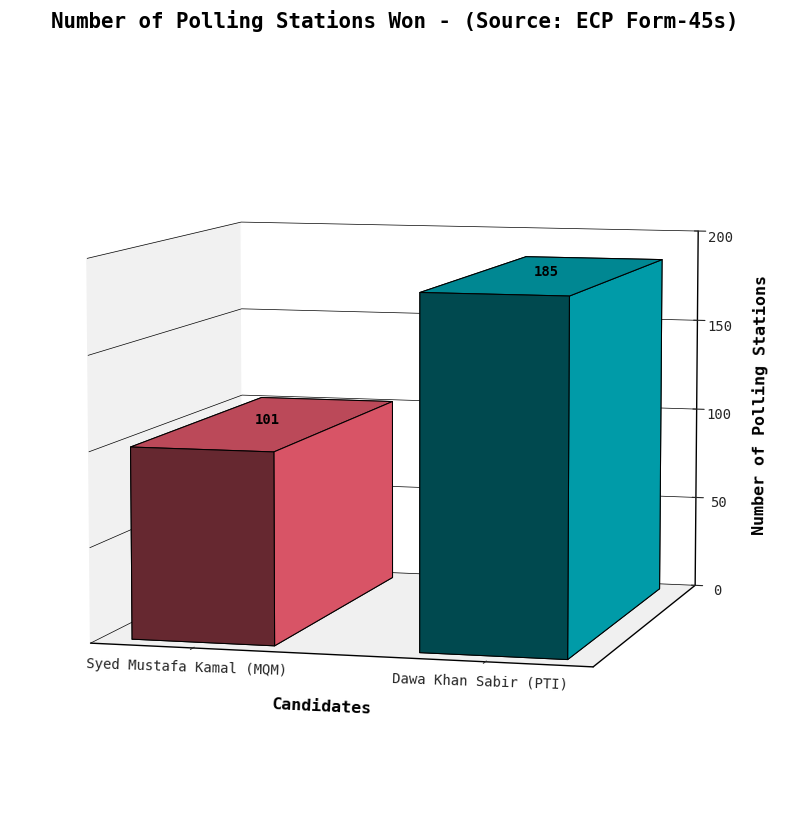

In [3]:
font_family = 'monospace' 
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = 10
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes3d.grid'] = True
plt.rcParams['axes3d.yaxis.panecolor'] = 'white'
plt.rcParams['axes3d.xaxis.panecolor'] = "#F1F1F1"
plt.rcParams['axes3d.zaxis.panecolor'] = '#F0F0F0'


data_242_ECP_Winner = data_242['WINNER_ECP'].value_counts().sort_index()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x_positions = np.arange(len(data_242_ECP_Winner.index))
y_positions = [0, 0]  
width = 0.5  
depth = 0.4 

for i, (candidate, count) in enumerate(data_242_ECP_Winner.items()):
    color = blue if i == 0 else (pink if i == 1 else yellow)
    ax.bar3d(
        x_positions[i], y_positions[0], 0, 
        width, depth, count,            
        color=color, shade=True, alpha=1, edgecolor='black', linewidth=0.75
    )
    
    ax.text(
        x_positions[i] + width/2, 
        y_positions[0] + depth/2, 
        count + 2,  
        f'{int(count)}',
        ha='center', va='center',
        fontweight='bold', color='black'
    )

ax.set_title('Number of Polling Stations Won - (Source: ECP Form-45s)', fontsize=15, fontweight='bold', color='black', pad=20)
ax.set_xlabel('Candidates', fontsize=FONT_SIZE, fontweight='bold', labelpad=10, color='black')
ax.set_ylabel('', fontsize=FONT_SIZE, fontweight='bold', labelpad=10)
ax.set_zlabel('Number of Polling Stations', fontsize=FONT_SIZE, fontweight='bold', labelpad=12, color='black')
ax.set_xticks(x_positions + width/2)
ax.set_xticklabels(data_242_ECP_Winner.index, rotation=-2, ha='center', fontsize=10, va='center')
ax.set_yticks([]) 
ax.zaxis.set_major_locator(MaxNLocator(nbins=4)) 
ax.zaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.set_zlim(0, max(data_242_ECP_Winner.values) + 15)
ax.view_init(elev=7, azim=105)
ax.xaxis._axinfo['grid']['linewidth'] = 0
ax.zaxis._axinfo['grid']['linewidth'] = 0.5
ax.zaxis._axinfo['grid']['color'] = "#000000" 

plt.savefig('./Graphs/Figure_1.svg', dpi=300, bbox_inches='tight',)
plt.show()

## **Graph 2**
Number of Votes received by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s)


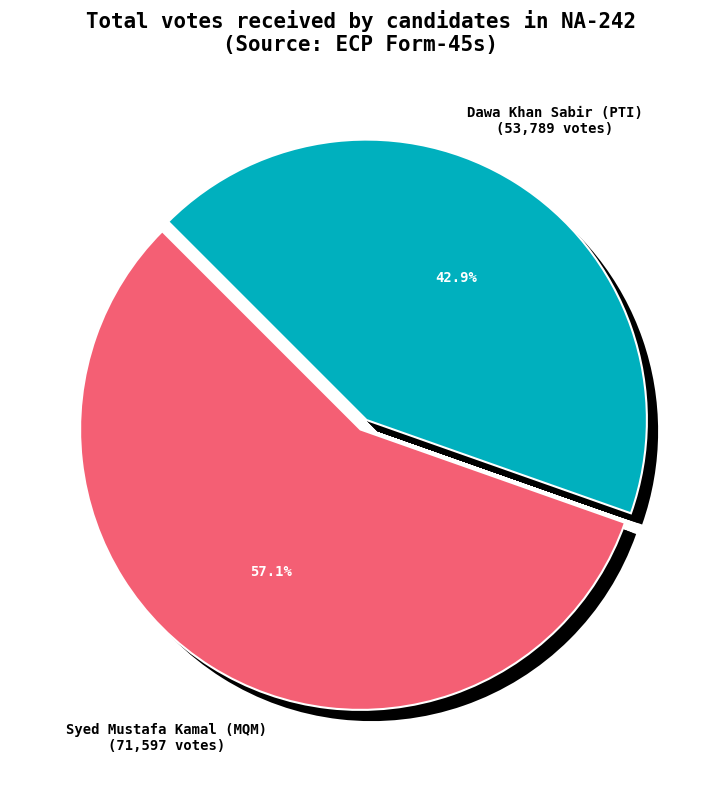

In [4]:
data_242_votes_ecp = data_242[['OPP_VOTES_ECP', 'PTI_VOTES_ECP']].sum()
data_242_votes_ecp.index = ['Syed Mustafa Kamal (MQM)', 'Dawa Khan Sabir (PTI)']
labels = data_242_votes_ecp.index
values = data_242_votes_ecp.values

candidate_colors = {
    'Syed Mustafa Kamal (MQM)': pink,
    'Dawa Khan Sabir (PTI)': blue
}
colors = [candidate_colors[label] for label in labels]

explode = [0, 0.04]
angle = 135
depth = 0.3
shadow_color = '#999999'

fig, ax = plt.subplots(figsize=(10, 8))

shadow_offset = 0.04 
shadow_color = "#000000" 
shadow_depth = 1.5 
shadow_layers = 100 
max_shadow_layers = 15 
min_radius = 0.75 
shadow_step = (1 - min_radius) / max_shadow_layers

for i in range(max_shadow_layers):
    r = 1 - i * shadow_step
    ax.pie(
        values,
        radius=r,
        startangle=angle,
        colors=[shadow_color] * len(values),
        explode=explode,
        labels=None,
        wedgeprops={
            'linewidth': 0,
            'edgecolor': 'none'
        },
        center=(shadow_offset, -shadow_offset), 
    )
    
depth_layers = 25 
for i in range(depth_layers):
    ax.pie(
        values,
        radius=1 - i * (depth / depth_layers), 
        startangle=angle,
        colors=colors,
        explode=explode,
        labels=None,
        wedgeprops={
            'linewidth': 0,
            'edgecolor': 'white'
        },
        frame=False
    )

wedges, texts, autotexts = ax.pie(
    values,
    radius=1,
    labels=None,
    autopct=lambda pct: f'{pct:.1f}%',
    startangle=angle,
    colors=colors,
    explode=explode,
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 1.5
    },
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'}
)

total = sum(values)
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2.
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    label = f"{labels[i]}\n({values[i]:,} votes)"
    ax.text(1.3 * x, 1.3 * y, label, ha='center', va='center', fontsize=10, weight='bold', color='black')

plt.title('Total votes received by candidates in NA-242\n(Source: ECP Form-45s)', fontsize=15, fontweight='bold', color='black', pad=20)
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig('./Graphs/Figure_2.svg', dpi=300, bbox_inches='tight')
plt.show()

## **Graph 3**
Distribution of Turnout percentages in General Elections 2024 in NA-242 (Based on ECP Form-45s) NA

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_81349/1845196520.py:30: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_81349/1845196520.py:30: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


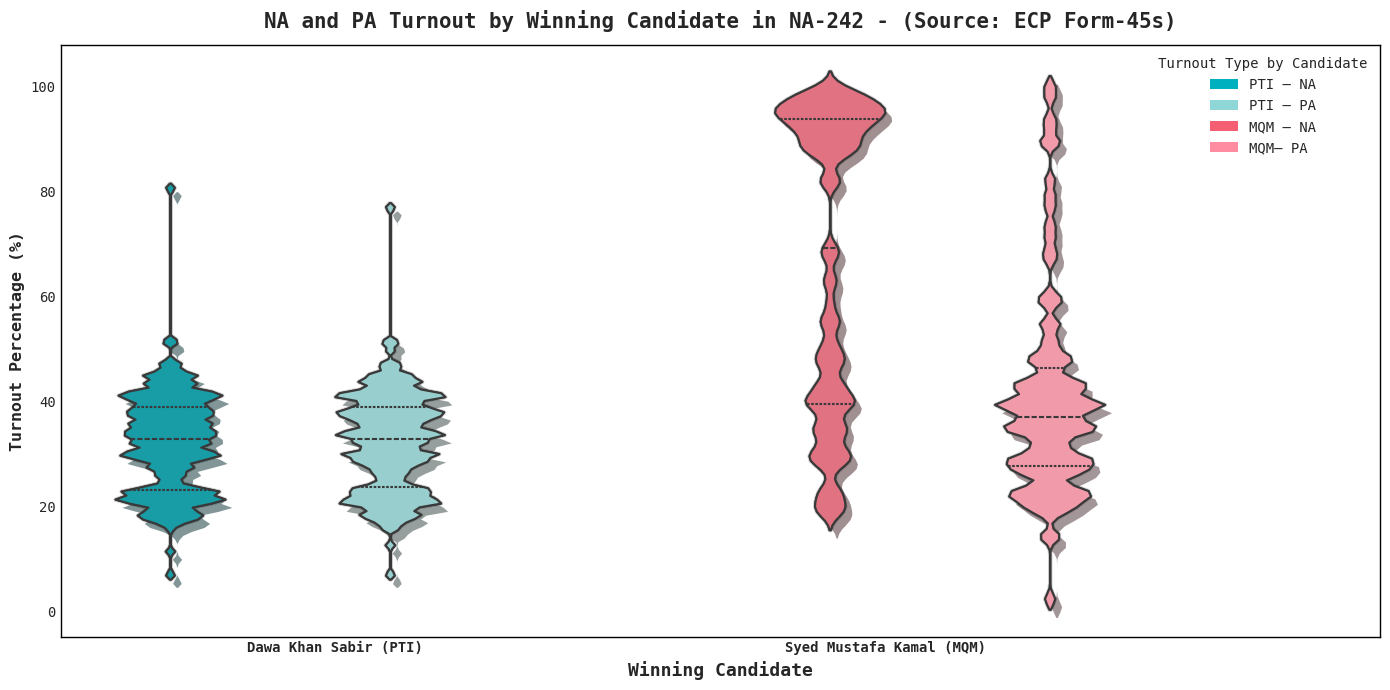

In [5]:
df_long = data_242[['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP']].copy()
df_long = df_long.melt(
    id_vars='WINNER_ECP',
    value_vars=['TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'],
    var_name='Turnout Type',
    value_name='Turnout Percentage'
    )
df_long['Turnout Type'] = df_long['Turnout Type'].str.replace('TURNOUT_', '').str.replace('_PERCENTAGE_ECP', '')
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].astype(float)

palette = {
    ('Dawa Khan Sabir (PTI)', 'NA'): blue,
    ('Dawa Khan Sabir (PTI)', 'PA'): light_blue,
    ('Syed Mustafa Kamal (MQM)', 'NA'): pink,
    ('Syed Mustafa Kamal (MQM)', 'PA'): light_pink
}

df_long['Hue Group'] = list(zip(df_long['WINNER_ECP'], df_long['Turnout Type']))

def add_3d_effects(patches):
    for p in patches:
        if p:
            p.set_path_effects([
                PathEffects.withStroke(linewidth=3, foreground='black', alpha=0.2),
                PathEffects.SimplePatchShadow(offset=(5, -6), alpha=0.5),
                PathEffects.Normal(),                
            ])

plt.figure(figsize=(14, 7))
ax = sns.violinplot(
    x='WINNER_ECP',
    y='Turnout Percentage',
    hue='Hue Group',
    data=df_long,
    palette=palette,
    inner='quartile',
    linewidth=1.5,
    scale='width',
    bw=0.05,
    dodge=True
)

add_3d_effects(ax.collections)

plt.xlabel('Winning Candidate', fontsize=13, fontweight='bold')
plt.ylabel('Turnout Percentage (%)', fontsize=12, fontweight='bold')
plt.title('NA and PA Turnout by Winning Candidate in NA-242 - (Source: ECP Form-45s)', fontsize=15, fontweight='bold', pad=12)
plt.xticks(fontsize=10, fontweight='semibold')
plt.yticks(fontsize=10)
plt.xlim(-0.5, 1.9)
ax.grid(axis='y', linestyle='--', alpha=0.3)
legend_elements = [
    Patch(facecolor=blue, label='PTI – NA'),
    Patch(facecolor=light_blue, label='PTI – PA'),
    Patch(facecolor=pink, label='MQM – NA'),
    Patch(facecolor=light_pink, label='MQM– PA')
]
ax.legend(handles=legend_elements, title='Turnout Type by Candidate', loc='upper right', frameon=False)
plt.tight_layout()
plt.savefig('./Graphs/Figure_3.svg', dpi=300, bbox_inches='tight')
plt.show()

## **Graph 4**
Number of polling stations won by each candidate in General Elections 2024 in NA-242 (Based on ECP Form-45s) where turnout difference between NA and PA was more than 50 votes

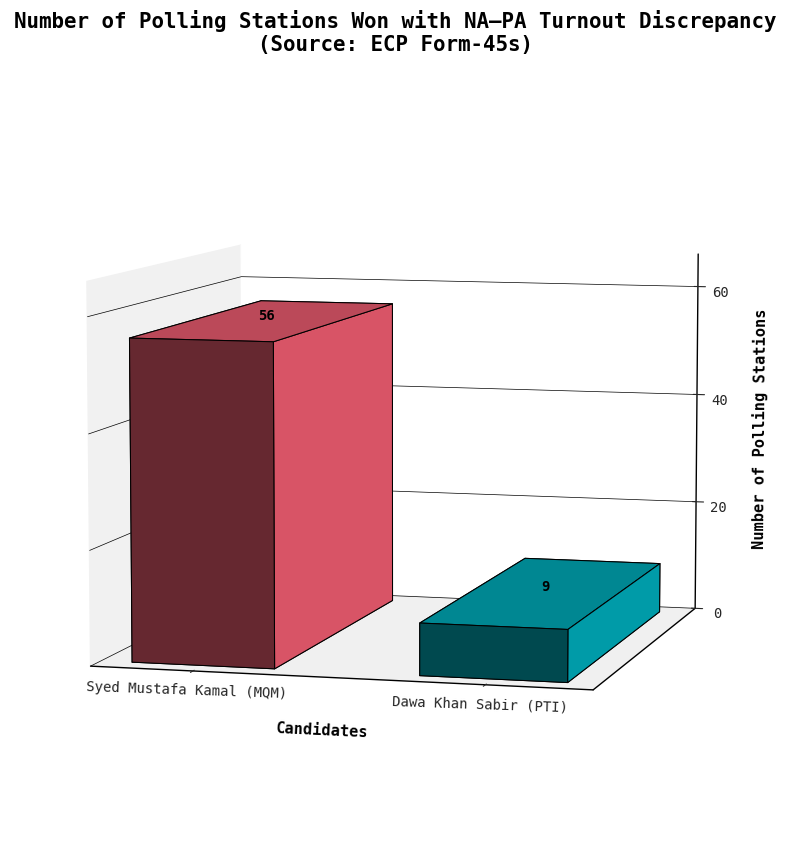

In [6]:
data_242_Discrepency = data_242[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_242_Discrepency = data_242_Discrepency[abs(data_242_Discrepency['TURNOUT_DIFFERENCE']) >= 50]
data_242_ECP_Winner_discrepency = data_242_Discrepency['WINNER_ECP'].value_counts().sort_index()

font_family = 'monospace' 
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = 10
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes3d.grid'] = True
plt.rcParams['axes3d.yaxis.panecolor'] = 'white'
plt.rcParams['axes3d.xaxis.panecolor'] = "#F1F1F1"
plt.rcParams['axes3d.zaxis.panecolor'] = '#F0F0F0'

x_positions = np.arange(len(data_242_ECP_Winner_discrepency.index))
y_positions = [0, 0]
width = 0.5
depth = 0.4
colors = [blue if i == 0 else pink for i in range(len(data_242_ECP_Winner_discrepency))]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, (candidate, count) in enumerate(data_242_ECP_Winner_discrepency.items()):
    ax.bar3d(
        x_positions[i], y_positions[0], 0,
        width, depth, count,
        color=colors[i], shade=True, alpha=1,
        edgecolor='black', linewidth=0.75
    )

    ax.text(
        x_positions[i] + width/2,
        y_positions[0] + depth/2,
        count + 1,
        f'{int(count)}',
        ha='center', va='center',
        fontweight='bold', color='black', fontsize=10
    )
    
ax.set_title(
    'Number of Polling Stations Won with NA–PA Turnout Discrepancy\n(Source: ECP Form-45s)',
    fontsize=15, fontweight='bold', color='black', pad=20
)
ax.set_xlabel('Candidates', fontsize=11, fontweight='bold', labelpad=10, color='black')
ax.set_ylabel('', fontsize=11, fontweight='bold', labelpad=10)
ax.set_zlabel('Number of Polling Stations', fontsize=11, fontweight='bold', labelpad=12, color='black')
ax.set_xticks(x_positions + width / 2)
ax.set_xticklabels(data_242_ECP_Winner_discrepency.index, rotation=-2, ha='center', fontsize=10, va='center')
ax.set_yticks([])
ax.zaxis.set_major_locator(MaxNLocator(nbins=4))
ax.zaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.set_zlim(0, max(data_242_ECP_Winner_discrepency.values) + 10)
ax.view_init(elev=7, azim=105)
ax.xaxis._axinfo['grid']['linewidth'] = 0
ax.zaxis._axinfo['grid']['linewidth'] = 0.5
ax.zaxis._axinfo['grid']['color'] = "#000000"
plt.savefig('./Graphs/Figure_4.svg', dpi=300, bbox_inches='tight')
plt.show()

## **Graph 5**
This shows the distribution of absolute turnout differences between NA and PA polling stations in General Elections 2024 in NA-242 (Based on ECP Form-45s)

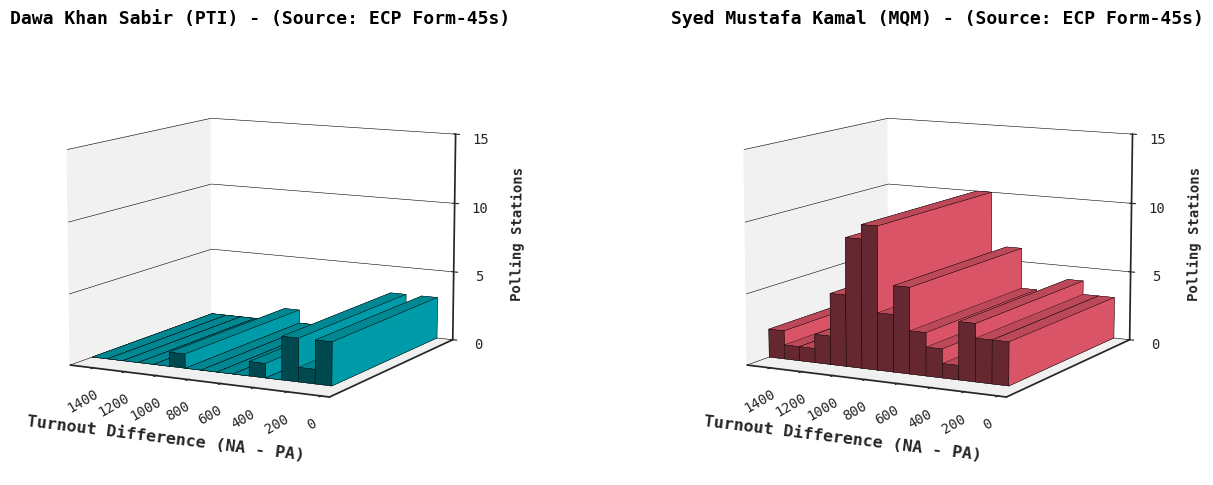

In [7]:
data_242_discrepency = data_242[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_242_discrepency = data_242_discrepency[abs(data_242_discrepency['TURNOUT_DIFFERENCE']) >= 50]
min_diff = (data_242_discrepency['TURNOUT_DIFFERENCE'].min() // 100) * 100
max_diff = (data_242_discrepency['TURNOUT_DIFFERENCE'].max() // 100 + 1) * 100
bin_edges = np.arange(min_diff, max_diff + 100, 100)
bin_centers = bin_edges[:-1] + 50
candidates = sorted(data_242_discrepency['WINNER_ECP'].unique())
candidate_data = {c: data_242_discrepency[data_242_discrepency['WINNER_ECP'] == c] for c in candidates}

plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 10

fig = plt.figure(figsize=(14, 6))
colors = [blue, pink]
for i, (candidate, subset) in enumerate(candidate_data.items()):
    hist, _ = np.histogram(subset['TURNOUT_DIFFERENCE'], bins=bin_edges)
    xpos = bin_centers
    ypos = np.full_like(xpos, 0) 
    zpos = np.zeros_like(xpos)
    dx = 100
    dy = 0.3
    dz = hist
    ax = fig.add_subplot(1, 2, i + 1, projection='3d')
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors[i], alpha=1, edgecolor='black', linewidth=0.25)
    ax.set_title(f'{candidate} - (Source: ECP Form-45s)', fontsize=13, fontweight='bold', color='black')
    ax.set_xlabel('Turnout Difference (NA - PA)', fontsize=12, fontweight='bold', labelpad=13)
    ax.set_ylabel('', fontsize=10)
    ax.set_zlabel('Polling Stations', fontsize=10, fontweight='bold', labelpad=8)
    ax.set_xlim(min_diff - 50, max_diff + 50)
    ax.set_ylim(-0.5, 1.5)
    ax.set_yticks([])
    ax.tick_params(axis='x', labelrotation=30, direction='inout',)
    ax.set_zlim(0, 15)
    ax.set_ylim(0, 0.35)
    ax.zaxis.set_major_locator(MaxNLocator(nbins=3))
    ax.view_init(elev=10, azim=118)
    ax.xaxis._axinfo['grid']['linewidth'] = 0
    ax.yaxis._axinfo['grid']['linewidth'] = 0
    ax.zaxis._axinfo['grid']['linewidth'] = 0.4
    ax.zaxis._axinfo['grid']['color'] = '#000000'


plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.savefig('./Graphs/Figure_5.svg', dpi=300, bbox_inches='tight',format='svg')
plt.show()

# **PTI Form 45s**

## **Graph 6**
This graph shows the number of polling stations won by the candidates in General Elections 2024 in NA-242 (Based on PTI Form-45s)

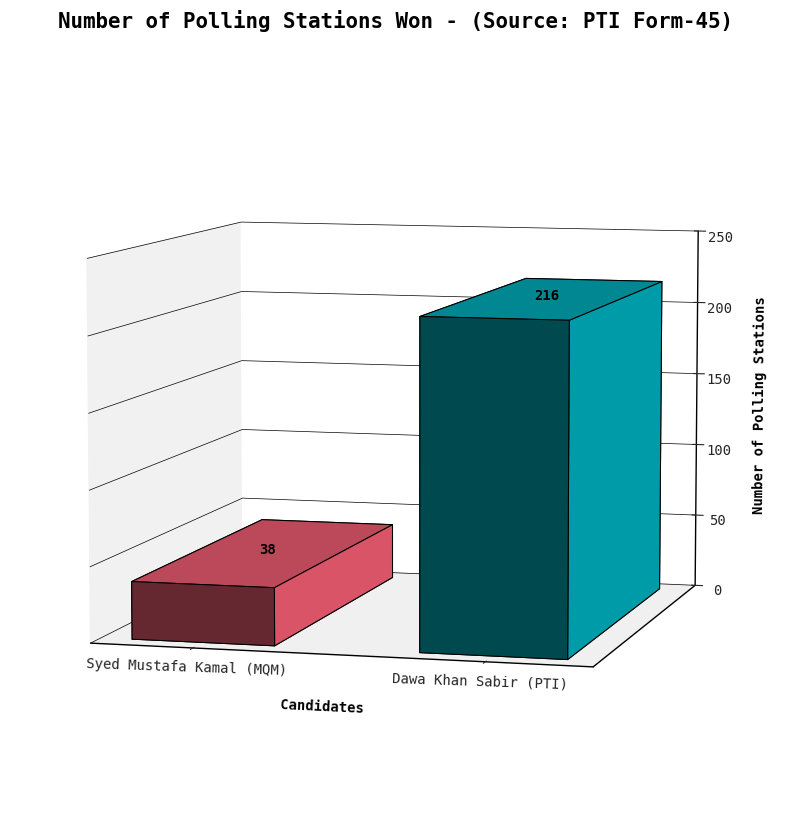

In [8]:
data_242_pti['OPP_VOTES_PTI_NUM'] = pd.to_numeric(data_242_pti['OPP_VOTES_PTI'], errors='coerce')
data_242_pti['PTI_VOTES_PTI_NUM'] = pd.to_numeric(data_242_pti['PTI_VOTES_PTI'], errors='coerce')
data_242_pti['PTI_WINNER'] = np.where(
    data_242_pti['PTI_VOTES_PTI_NUM'] > data_242_pti['OPP_VOTES_PTI_NUM'],
    'Dawa Khan Sabir (PTI)',
    'Syed Mustafa Kamal (MQM)'
)

pti_winner_counts = data_242_pti['PTI_WINNER'].value_counts()
font_family = 'monospace' 
plt.style.use('seaborn-v0_8-white')
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = 10
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['grid.color'] = 'white'
plt.rcParams['axes3d.grid'] = True
plt.rcParams['axes3d.yaxis.panecolor'] = 'white'
plt.rcParams['axes3d.xaxis.panecolor'] = "#F1F1F1"
plt.rcParams['axes3d.zaxis.panecolor'] = '#F0F0F0'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x_positions = np.arange(len(pti_winner_counts.index))
y_positions = [0, 0]
width = 0.5
depth = 0.4
bar_colors = [blue if i == 0 else pink for i in range(len(pti_winner_counts))]

for i, (candidate, count) in enumerate(pti_winner_counts.items()):
    ax.bar3d(
        x_positions[i], y_positions[0], 0,
        width, depth, count,
        color=bar_colors[i], shade=True, alpha=1, edgecolor='black', linewidth=0.75
    )
    ax.text(
        x_positions[i] + width / 2,
        y_positions[0] + depth / 2,
        count + 2,
        f'{int(count)}',
        ha='center', va='center',
        fontweight='bold', color='black'
    )

ax.set_title('Number of Polling Stations Won - (Source: PTI Form-45)', fontsize=15, fontweight='bold', color='black', pad=20)
ax.set_xlabel('Candidates', fontsize=10, fontweight='bold', labelpad=10, color='black')
ax.set_ylabel('', fontsize=10, fontweight='bold', labelpad=10)
ax.set_zlabel('Number of Polling Stations', fontsize=10, fontweight='bold', labelpad=12, color='black')

ax.set_xticks(x_positions + width / 2)
ax.set_xticklabels(pti_winner_counts.index, rotation=-2, ha='center', fontsize=10, va='center')
ax.set_yticks([])

ax.zaxis.set_major_locator(MaxNLocator(nbins=5))
ax.zaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.set_zlim(0, 250)
ax.view_init(elev=7, azim=105)
ax.xaxis._axinfo['grid']['linewidth'] = 0
ax.zaxis._axinfo['grid']['linewidth'] = 0.5
ax.zaxis._axinfo['grid']['color'] = "#000000"

plt.savefig('./Graphs/Figure_6.svg', dpi=300, bbox_inches='tight')
plt.show()

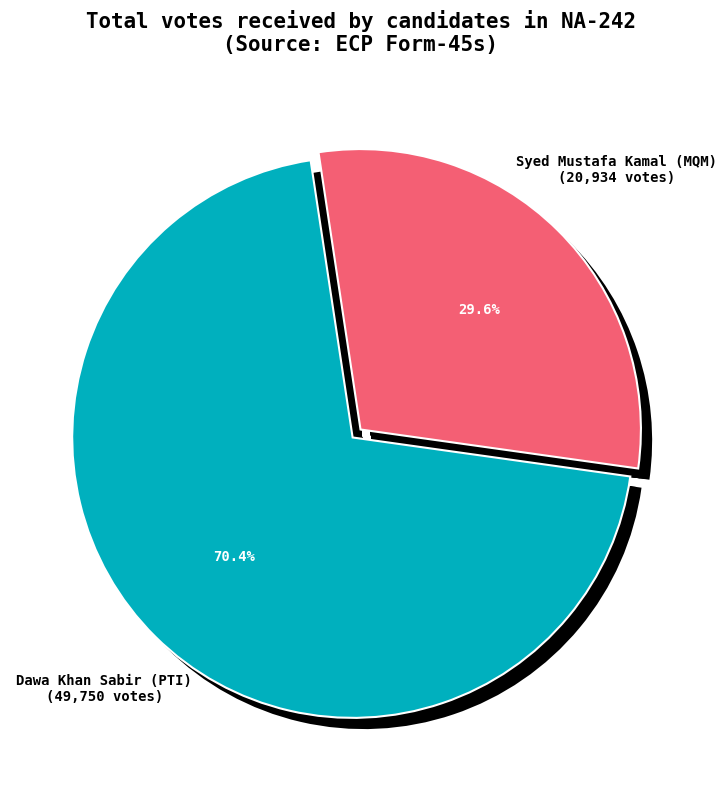

In [9]:
data_242_votes_pti = data_242_pti[['OPP_VOTES_PTI_NUM', 'PTI_VOTES_PTI_NUM']].sum()
data_242_votes_pti.index = ['Syed Mustafa Kamal (MQM)', 'Dawa Khan Sabir (PTI)']
candidate_colors = {
    'Syed Mustafa Kamal (MQM)': pink,
    'Dawa Khan Sabir (PTI)': blue
}
colors = [candidate_colors[name] for name in data_242_votes_pti.index]
labels = data_242_votes_pti.index
values = data_242_votes_pti.values
total_votes = sum(values)

candidate_colors = {
    'Syed Mustafa Kamal (MQM)': pink,
    'Dawa Khan Sabir (PTI)': blue
}
colors = [candidate_colors[label] for label in labels]

explode = [0, 0.04]
angle = -8
depth = 0.3
shadow_color = '#999999'

fig, ax = plt.subplots(figsize=(10, 8))

shadow_offset = 0.04 
shadow_color = "#000000" 
shadow_depth = 1.5 
shadow_layers = 100 
max_shadow_layers = 15 
min_radius = 0.75 
shadow_step = (1 - min_radius) / max_shadow_layers

for i in range(max_shadow_layers):
    r = 1 - i * shadow_step
    ax.pie(
        values,
        radius=r,
        startangle=angle,
        colors=[shadow_color] * len(values),
        explode=explode,
        labels=None,
        wedgeprops={
            'linewidth': 0,
            'edgecolor': 'none'
        },
        center=(shadow_offset, -shadow_offset), 
    )
    
depth_layers = 25 
for i in range(depth_layers):
    ax.pie(
        values,
        radius=1 - i * (depth / depth_layers), 
        startangle=angle,
        colors=colors,
        explode=explode,
        labels=None,
        wedgeprops={
            'linewidth': 0,
            'edgecolor': 'white'
        },
        frame=False
    )

wedges, texts, autotexts = ax.pie(
    values,
    radius=1,
    labels=None,
    autopct=lambda pct: f'{pct:.1f}%',
    startangle=angle,
    colors=colors,
    explode=explode,
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 1.5
    },
    textprops={'fontsize': 10, 'weight': 'bold', 'color': 'white'}
)

total = sum(values)
for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1) / 2.
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    label = f"{labels[i]}\n({values[i]:,} votes)"
    ax.text(1.3 * x, 1.3 * y, label, ha='center', va='center', fontsize=10, weight='bold', color='black')
    
plt.title('Total votes received by candidates in NA-242\n(Source: ECP Form-45s)', fontsize=15, fontweight='bold', color='black', pad=20)
ax.set_aspect('equal')
plt.tight_layout()
plt.savefig('./Graphs/Figure_7.svg', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
data_242_correlation = data_242.copy()
data_242_correlation['OPP_VOTES_PTI_NUM'] = pd.to_numeric(data_242_correlation['OPP_VOTES_PTI'], errors='coerce')
data_242_correlation['PTI_VOTES_PTI_NUM'] = pd.to_numeric(data_242_correlation['PTI_VOTES_PTI'], errors='coerce')
data_242_correlation['WINNER_PTI'] = np.where(
    pd.isna(data_242_correlation['PTI_VOTES_PTI_NUM']) | 
    pd.isna(data_242_correlation['OPP_VOTES_PTI_NUM']),
    'Missing',
    np.where(
        data_242_correlation['PTI_VOTES_PTI_NUM'] > data_242_correlation['OPP_VOTES_PTI_NUM'],
        'Dawa Khan Sabir (PTI)',
        'Syed Mustafa Kamal (MQM)'
    )
)
data_242_correlation['PTI_ECP_Winner_Discrepency'] = np.where(
    data_242_correlation['WINNER_PTI'] == 'Missing',
    'Missing',
    np.where(
        (data_242_correlation['WINNER_PTI'] != data_242_correlation['WINNER_ECP']) & 
        (data_242_correlation['WINNER_PTI'] == 'Dawa Khan Sabir (PTI)'),
        1,
        np.where(
            (data_242_correlation['WINNER_PTI'] != data_242_correlation['WINNER_ECP']) & 
            (data_242_correlation['WINNER_PTI'] == 'Syed Mustafa Kamal (MQM)'),
            2,
            0
        )
    )
)

data_242_correlation['NA_PA_DISCREPENCY'] = np.where(data_242_correlation['TURNOUT_DIFFERENCE'] >= 50, 1, 0)
data_242_correlation_final = data_242_correlation[
    ['WINNER_ECP', 'WINNER_PTI', 'PTI_ECP_Winner_Discrepency', 'NA_PA_DISCREPENCY']
].copy()


data_242_correlation_final = data_242_correlation_final[data_242_correlation_final['PTI_ECP_Winner_Discrepency'] != 'Missing']

df = data_242_correlation_final.copy()
df['Dawa_Khan_Wins'] = df['WINNER_ECP'] == 'Dawa Khan Sabir (PTI)'
df['Mustafa_Kamal_Wins'] = df['WINNER_ECP'] == 'Syed Mustafa Kamal (MQM)'
df['Discrepant'] = df['PTI_ECP_Winner_Discrepency'] == '1'
df['Turnout_Discrepant'] = df['NA_PA_DISCREPENCY'] == 1
df['Both_Discrepant'] = df['Discrepant'] & df['Turnout_Discrepant']
memberships = []
for _, row in df.iterrows():
    tags = []
    if row['Dawa_Khan_Wins']:
        tags.append("Dawa Khan Wins")
    if row['Mustafa_Kamal_Wins']:
        tags.append("Mustafa Kamal Wins")
    if row['Discrepant']:
        tags.append("Discrepant with ECP")
    if row['Turnout_Discrepant']:
        tags.append("Turnout ≥ 50")
    memberships.append(tags)

In [11]:
circle_names = [
    'Dawa Khan Wins',
    'Mustafa Kamal Wins',
    'Winner Discrepant | ECP-PTI',
    'Turnout Discrepant ≥ 50 | NA-PA',
    'Both Discrepant | ECP-PTI & NA-PA'
]
circle_colors = [blue, pink, light_blue, light_pink, orange]

circle_intersection_counts = {
    'Dawa Khan Wins': len(df[df['Dawa_Khan_Wins']]),
    'Mustafa Kamal Wins': len(df[df['Mustafa_Kamal_Wins']]),
    'Winner Discrepant | ECP-PTI': len(df[df['Discrepant']]),
    'Turnout Discrepant ≥ 50 | NA-PA': len(df[df['Turnout_Discrepant']]),
    'Both Discrepant | ECP-PTI & NA-PA': len(df[df['Both_Discrepant']]),
    'Dawa Khan Wins & Winner Discrepant | ECP-PTI': len(df[df['Dawa_Khan_Wins'] & df['Discrepant']]),
    'Mustafa Kamal Wins & Winner Discrepant | ECP-PTI': len(df[df['Mustafa_Kamal_Wins'] & df['Discrepant']]),
    'Dawa Khan Wins & Turnout Discrepant > 50 | NA-PA': len(df[df['Dawa_Khan_Wins'] & df['Turnout_Discrepant']]),
    'Mustafa Kamal Wins & Turnout Discrepant > 50 | NA-PA': len(df[df['Mustafa_Kamal_Wins'] & df['Turnout_Discrepant']]),
    'Dawa Khan Wins & Both Discrepant | ECP-PTI & NA-PA': len(df[df['Dawa_Khan_Wins'] & df['Both_Discrepant']]),
    'Mustafa Kamal Wins & Both Discrepant | ECP-PTI & NA-PA': len(df[df['Mustafa_Kamal_Wins'] & df['Both_Discrepant']]),
    'Winner Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA': len(df[df['Discrepant'] & df['Turnout_Discrepant']]),
    'Dawa Khan Wins & Winner Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA': len(df[df['Dawa_Khan_Wins'] & df['Discrepant'] & df['Turnout_Discrepant']]),
    'Mustafa Kamal Wins & Winner Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA': len(df[df['Mustafa_Kamal_Wins'] & df['Discrepant'] & df['Turnout_Discrepant']]),
    'Dawa Khan Wins & Both Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA': len(df[df['Dawa_Khan_Wins'] & df['Both_Discrepant'] & df['Turnout_Discrepant']]),
    'Mustafa Kamal Wins & Both Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA': len(df[df['Mustafa_Kamal_Wins'] & df['Both_Discrepant'] & df['Turnout_Discrepant']]),
}
import json
print(json.dumps(circle_intersection_counts, indent=4))

import pandas as pd
import numpy as np

# 1. Define category names
categories = [
    'Dawa Khan Wins',
    'Mustafa Kamal Wins',
    'Winner Discrepant | ECP-PTI',
    'Turnout Discrepant ≥ 50 | NA-PA',
    'Both Discrepant | ECP-PTI & NA-PA'
]

# 2. Create boolean masks
bool_masks = {
    'Dawa Khan Wins': df['Dawa_Khan_Wins'],
    'Mustafa Kamal Wins': df['Mustafa_Kamal_Wins'],
    'Winner Discrepant | ECP-PTI': df['Discrepant'],
    'Turnout Discrepant ≥ 50 | NA-PA': df['Turnout_Discrepant'],
    'Both Discrepant | ECP-PTI & NA-PA': df['Both_Discrepant']
}

# 3. Initialize 5x5 confusion matrix
conf_matrix = pd.DataFrame(index=categories, columns=categories, dtype=int)

# 4. Populate matrix with intersection counts (+1 smoothing)
for i in categories:
    for j in categories:
        intersect_count = (bool_masks[i] & bool_masks[j]).sum()  # Add-1 smoothing
        conf_matrix.loc[i, j] = intersect_count

# 5. Display
print(conf_matrix)

{
    "Dawa Khan Wins": 180,
    "Mustafa Kamal Wins": 91,
    "Winner Discrepant | ECP-PTI": 49,
    "Turnout Discrepant \u2265 50 | NA-PA": 60,
    "Both Discrepant | ECP-PTI & NA-PA": 45,
    "Dawa Khan Wins & Winner Discrepant | ECP-PTI": 0,
    "Mustafa Kamal Wins & Winner Discrepant | ECP-PTI": 49,
    "Dawa Khan Wins & Turnout Discrepant > 50 | NA-PA": 8,
    "Mustafa Kamal Wins & Turnout Discrepant > 50 | NA-PA": 52,
    "Dawa Khan Wins & Both Discrepant | ECP-PTI & NA-PA": 0,
    "Mustafa Kamal Wins & Both Discrepant | ECP-PTI & NA-PA": 45,
    "Winner Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA": 45,
    "Dawa Khan Wins & Winner Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA": 0,
    "Mustafa Kamal Wins & Winner Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA": 45,
    "Dawa Khan Wins & Both Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA": 0,
    "Mustafa Kamal Wins & Both Discrepant | ECP-PTI & Turnout Discrepant > 50 | NA-PA": 45
}
        

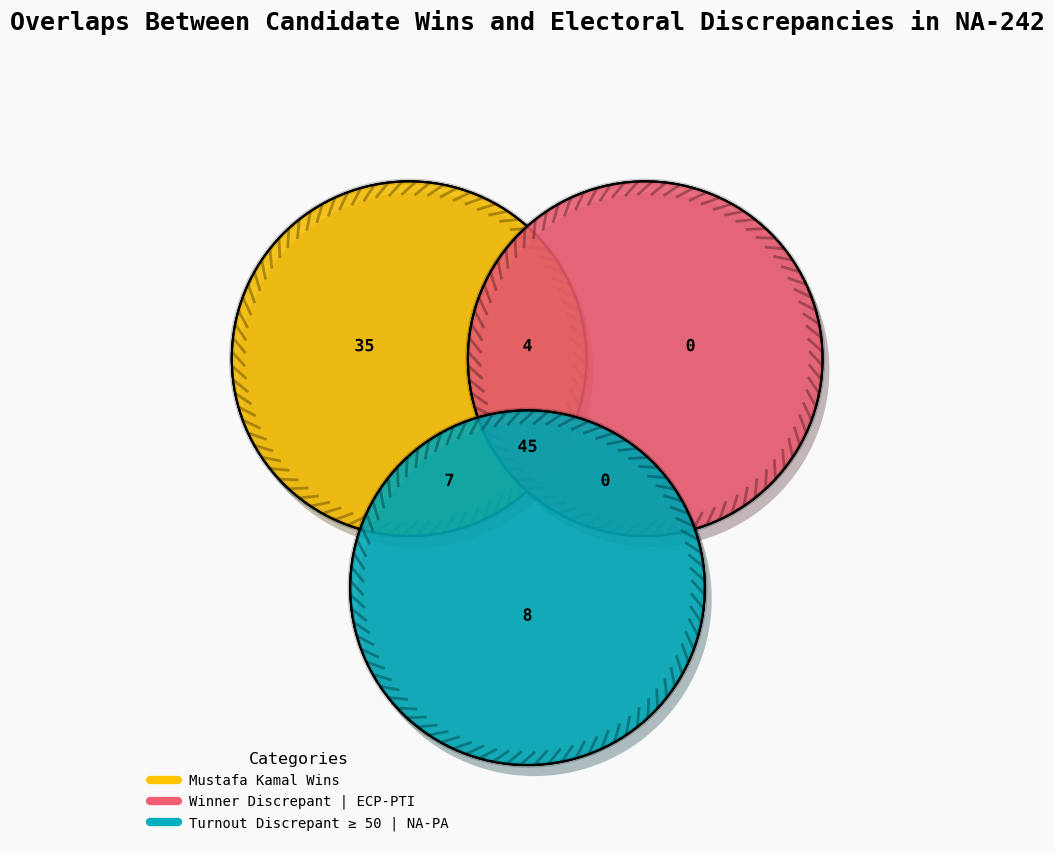

In [12]:
sets = {
    "Mustafa Kamal Wins": set(df[df["Mustafa_Kamal_Wins"]].index),
    "Winner Discrepant": set(df[df["Discrepant"]].index),
    "Turnout Discrepant ≥ 50": set(df[df["Turnout_Discrepant"]].index),
}

for key in sets:
    if len(sets[key]) == 0:
        sets[key] = set([f"dummy_{key}"])

plt.rcParams.update({
    "font.family": "monospace",
    "font.size": 12,
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "text.color": "black"
})

fig, ax = plt.subplots(figsize=(11, 9))
venn_diagram = venn(sets, cmap=[yellow, pink, blue], fontsize=0, ax=ax)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
    patch.set_path_effects([
        PathEffects.SimplePatchShadow(offset=(0, 0), alpha=0.3),
        PathEffects.SimplePatchShadow(offset=(5, -8), alpha=0.3),
        PathEffects.Normal(),
        PathEffects.withStroke(linewidth=4, foreground='black', alpha=0.2),
        PathEffects.withTickedStroke(linewidth=2, foreground='black', alpha=0.5),
    
    ])

for label in ax.texts:
    label.set_fontsize(12)
    label.set_color('black')
    label.set_weight('bold')
    label.set_path_effects([
        PathEffects.Normal(),
    ])

ax.set_facecolor("#f9f9f9")
fig.patch.set_facecolor("#f9f9f9")

legend_labels = [
    "Mustafa Kamal Wins",
    "Winner Discrepant | ECP-PTI",
    "Turnout Discrepant ≥ 50 | NA-PA"
]
legend_colors = [yellow, pink, blue]
handles = [plt.Line2D([0], [0], color=color, lw=6) for color in legend_colors]
ax.legend(handles, legend_labels, loc='lower left', fontsize=10, title='Categories', title_fontsize=12, frameon=False, )
    

ax.grid(False)
ax.axis('off')

plt.title("Overlaps Between Candidate Wins and Electoral Discrepancies in NA-242", pad=24)

plt.tight_layout(pad=2.0)
plt.savefig('./Graphs/Figure_8.svg', dpi=400, bbox_inches='tight', format='svg')
plt.show()